In [1]:
import os
import pandas as pd
import zipfile
from matplotlib import pyplot as plt


# Path to your ZIP file
zip_file_path = r"C:\Users\VARKEY JOSHY T\Desktop\WESAD\S17\S17_E4_Data.zip"

# Temporary folder to extract files
extract_folder = "extracted_files"

# Create a folder for extraction if it doesn't exist
if not os.path.exists(extract_folder):
    os.makedirs(extract_folder)

# Extract ZIP file
with zipfile.ZipFile(r"C:\Users\VARKEY JOSHY T\Desktop\WESAD\S17\S17_E4_Data.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List of expected CSV files in the ZIP
csv_files = ['ACC.csv', 'HR.csv', 'EDA.csv', 'BVP.csv', 'IBI.csv', 'TEMP.csv']

# Initialize a list to store DataFrames
data_frames = []

# Read and store each CSV file
for csv_file in csv_files:
    file_path = os.path.join(extract_folder, csv_file)
    if os.path.exists(file_path):  # Check if the file exists in the extracted folder
        temp_data = pd.read_csv(file_path)

        # Replace column names with the file name prefix
        file_name_without_extension = os.path.splitext(csv_file)[0]
        temp_data.columns = [f"{file_name_without_extension}_{col}" for col in temp_data.columns]

        data_frames.append(temp_data)
    else:
        print(f"Warning: {csv_file} not found in the extracted folder.")

# Combine all DataFrames side by side
merged_data = pd.concat(data_frames, axis=1)

# Display the combined table
display(merged_data) 

# Save the combined data to a CSV file
output_file = 'S17_E4_Data.csv'
merged_data.to_csv(output_file, index=False)

print(f"CSV files combined successfully into '{output_file}'")

,ACC_1502435962.000000,ACC_ 1502435962.000000,ACC_ 1502435962.000000.1,HR_1502435972.000000,EDA_1502435962.000000,BVP_1502435962.00,IBI_1502435962.000000,IBI_ IBI,TEMP_1502435962.000000
0,32.0,32.0,32.0,1.00,4.000000,64.00,13.016221,0.812537,4.00
1,-17.0,14.0,59.0,60.00,0.000000,-0.00,13.844384,0.828163,382.21
2,-17.0,14.0,59.0,60.00,0.861040,-0.00,14.672547,0.828163,382.21
3,-17.0,14.0,59.0,62.67,1.204187,-0.00,15.500710,0.828163,382.21
4,-17.0,14.0,59.0,64.00,1.641812,-0.00,16.360124,0.859414,382.21
...,...,...,...,...,...,...,...,...,...
462821,NaN,NaN,NaN,NaN,NaN,-53.29,NaN,NaN,NaN
462822,NaN,NaN,NaN,NaN,NaN,-52.71,NaN,NaN,NaN
462823,NaN,NaN,NaN,NaN,NaN,-52.26,NaN,NaN,NaN
462824,NaN,NaN,NaN,NaN,NaN,-52.11,NaN,NaN,NaN


CSV files combined successfully into 'S17_E4_Data.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('S17_E4_Data.csv')  

In [3]:
# Display the first few rows of the dataset
print(df.head())

# Get an overview of the dataset
print(df.info())
print(df.describe())

   ACC_1502435962.000000  ACC_ 1502435962.000000  ACC_ 1502435962.000000.1  \
0                   32.0                    32.0                      32.0   
1                  -17.0                    14.0                      59.0   
2                  -17.0                    14.0                      59.0   
3                  -17.0                    14.0                      59.0   
4                  -17.0                    14.0                      59.0   

   HR_1502435972.000000  EDA_1502435962.000000  BVP_1502435962.00  \
0                  1.00               4.000000               64.0   
1                 60.00               0.000000               -0.0   
2                 60.00               0.861040               -0.0   
3                 62.67               1.204187               -0.0   
4                 64.00               1.641812               -0.0   

   IBI_1502435962.000000  IBI_ IBI  TEMP_1502435962.000000  
0              13.016221  0.812537                    4

In [4]:
# Fill missing values with mean
df_mean_filled = df.fillna(df.mean())
print(df_mean_filled.isnull().sum())

ACC_1502435962.000000       0
ACC_ 1502435962.000000      0
ACC_ 1502435962.000000.1    0
HR_1502435972.000000        0
EDA_1502435962.000000       0
BVP_1502435962.00           0
IBI_1502435962.000000       0
IBI_ IBI                    0
TEMP_1502435962.000000      0
dtype: int64


In [5]:
missing_values = df.isnull().sum()
print("\nMissing Values Summary:")
print(missing_values)


Missing Values Summary:
ACC_1502435962.000000       231411
ACC_ 1502435962.000000      231411
ACC_ 1502435962.000000.1    231411
HR_1502435972.000000        455603
EDA_1502435962.000000       433899
BVP_1502435962.00                0
IBI_1502435962.000000       460688
IBI_ IBI                    460688
TEMP_1502435962.000000      433905
dtype: int64


In [6]:
def detect_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, len(outliers), (lower_bound, upper_bound)

In [7]:
outlier_results = {}

for column in df.columns:
    outliers, count, bounds = detect_outliers_IQR(df, column)
    outlier_results[column] = {
        'count': count,
        'lower_bound': bounds[0],
        'upper_bound': bounds[1]
    }

In [8]:
# Print the results
for column, result in outlier_results.items():
    print(f"{column}: {result['count']} outliers found")

# Identify columns with more than 5% outliers
threshold = len(df) * 0.05
outlier_columns = {col: result['count'] for col, result in outlier_results.items() if result['count'] > threshold}

print("\nColumns with more than 5% outliers:")
for column, count in outlier_columns.items():
    print(f"{column}: {count} ({count/len(df)*100:.2f}%)")


ACC_1502435962.000000: 6286 outliers found
ACC_ 1502435962.000000: 532 outliers found
ACC_ 1502435962.000000.1: 100 outliers found
HR_1502435972.000000: 405 outliers found
EDA_1502435962.000000: 5076 outliers found
BVP_1502435962.00: 56740 outliers found
IBI_1502435962.000000: 0 outliers found
IBI_ IBI: 0 outliers found
TEMP_1502435962.000000: 5 outliers found

Columns with more than 5% outliers:
BVP_1502435962.00: 56740 (12.26%)


In [9]:
def detect_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Return only the count of outliers
    return len(outliers)

# Apply the function to each column
outlier_counts = {}
for column in df.columns:
    count = detect_outliers_IQR(df, column)
    outlier_counts[column] = count

# Identify columns with more than 5% outliers
threshold = len(df) * 0.05
outlier_columns = {col: count for col, count in outlier_counts.items() if count > threshold}

print("\nColumns with more than 5% outliers:")
for column, count in outlier_columns.items():
    print(f"{column}: {count} ({count/len(df)*100:.2f}%)")

# If you need the detailed results later, you can store them separately
detailed_outlier_results = {col: detect_outliers_IQR(df, col) for col in df.columns}


Columns with more than 5% outliers:
BVP_1502435962.00: 56740 (12.26%)


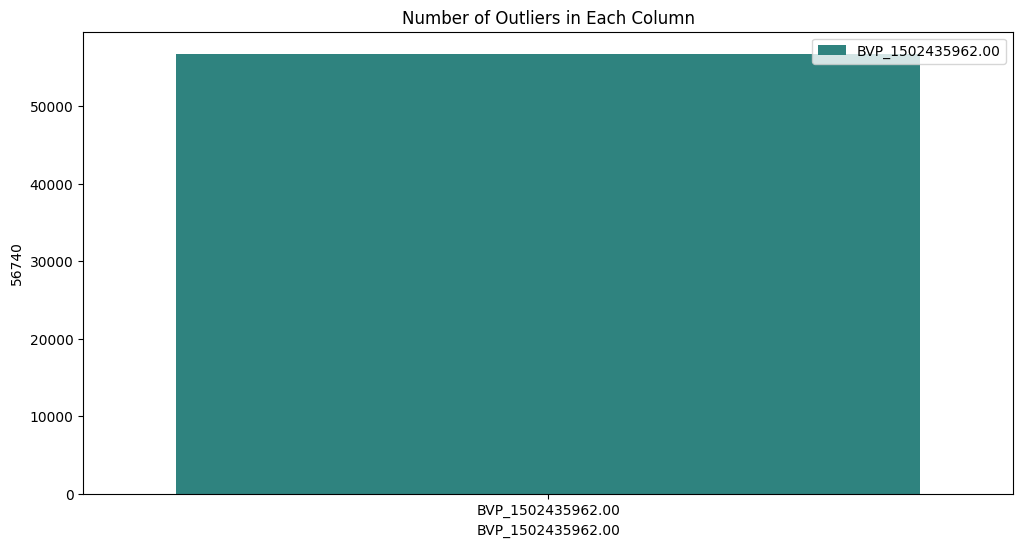

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the outliers
outlier_df = {col: count for col, count in outlier_counts.items() if count > threshold}


# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=outlier_df, x=list(outlier_df.keys()), y=list(outlier_df.values()), hue=list(outlier_df.keys()), palette='viridis', legend=True)

# Set title and labels
plt.title('Number of Outliers in Each Column')
plt.xlabel('BVP_1502435962.00')
plt.ylabel('56740')

# Show the plot
plt.show()

In [11]:
print("Original dataset shape:", df.shape)
# Step 1: Handle missing values
df_no_missing = df.dropna() 

# Step 2: Detect and handle outliers

outlier_counts = {}
for column in df_no_missing.columns:
    count = detect_outliers_IQR(df_no_missing, column)
    outlier_counts[column] = count

# Calculate percentage reduction in rows
percentage_reduction = ((len(df) - len(df_no_missing)) / len(df)) * 100

print("Original dataset shape:", df.shape)
print("Dataset after handling missing values and outliers:", df_no_missing.shape)
print(f"Percentage reduction in rows: {percentage_reduction:.2f}%")

Original dataset shape: (462826, 9)
Original dataset shape: (462826, 9)
Dataset after handling missing values and outliers: (2138, 9)
Percentage reduction in rows: 99.54%


Skewness for each column:
ACC_1502435962.000000        1.15
ACC_ 1502435962.000000       0.20
ACC_ 1502435962.000000.1    -0.40
HR_1502435972.000000         1.75
EDA_1502435962.000000        2.43
BVP_1502435962.00            0.34
IBI_1502435962.000000        0.32
IBI_ IBI                    -0.49
TEMP_1502435962.000000      82.35
dtype: float64

Skewness Representation:

ACC_1502435962.000000:
Skewness: 1.15
Skewness Level: Highly skewed

ACC_ 1502435962.000000:
Skewness: 0.2
Skewness Level: Symmetric

ACC_ 1502435962.000000.1:
Skewness: -0.4
Skewness Level: Symmetric

HR_1502435972.000000:
Skewness: 1.75
Skewness Level: Highly skewed

EDA_1502435962.000000:
Skewness: 2.43
Skewness Level: Highly skewed

BVP_1502435962.00:
Skewness: 0.34
Skewness Level: Symmetric

IBI_1502435962.000000:
Skewness: 0.32
Skewness Level: Symmetric

IBI_ IBI:
Skewness: -0.49
Skewness Level: Symmetric

TEMP_1502435962.000000:
Skewness: 82.35
Skewness Level: Highly skewed


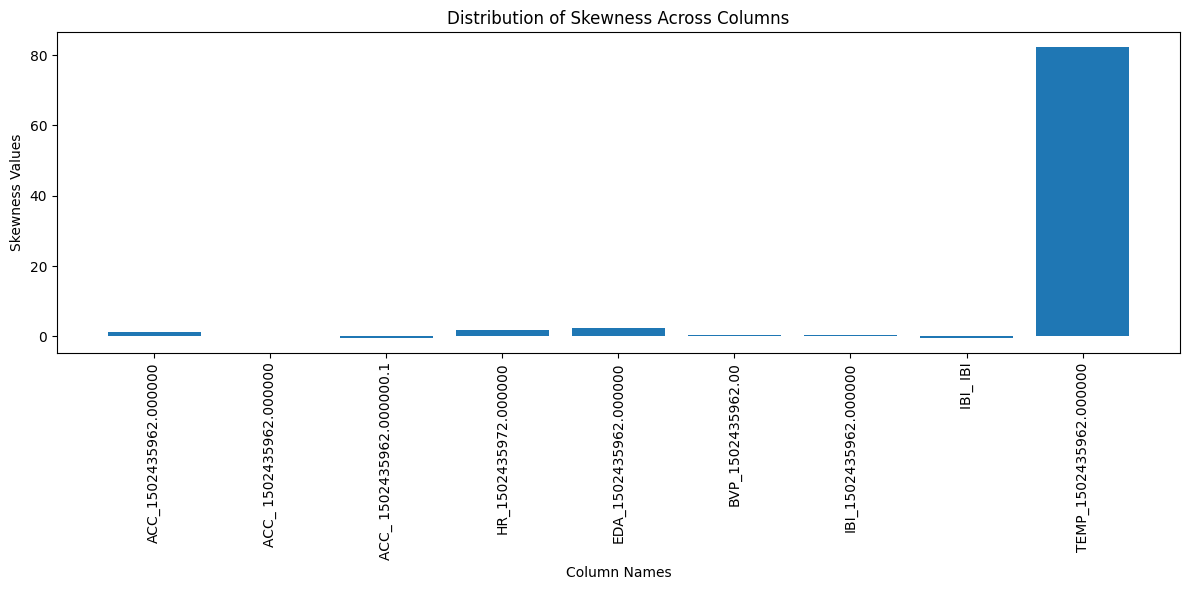

In [12]:
import pandas as pd
import numpy as np



# Find skewness for each column
skewness_results = df.skew()

# Round the skewness values to 2 decimal places
rounded_skewness = skewness_results.round(2)

# Print the results
print("Skewness for each column:")
print(rounded_skewness)

# Represent skewness levels
print("\nSkewness Representation:")
for column, skew_value in rounded_skewness.items():
    if abs(skew_value) < 0.5:
        skewness_level = "Symmetric"
    elif abs(skew_value) < 1:
        skewness_level = "Moderately skewed"
    else:
        skewness_level = "Highly skewed"
    
    print(f"\n{column}:")
    print(f"Skewness: {skew_value}")
    print(f"Skewness Level: {skewness_level}")

# Visualize skewness distribution
plt.figure(figsize=(12, 6))
skewness_values = rounded_skewness.values
plt.bar(range(len(skewness_values)), skewness_values)
plt.xticks(range(len(skewness_values)), rounded_skewness.index, rotation=90)
plt.title('Distribution of Skewness Across Columns')
plt.xlabel('Column Names')
plt.ylabel('Skewness Values')
plt.tight_layout()
plt.show()

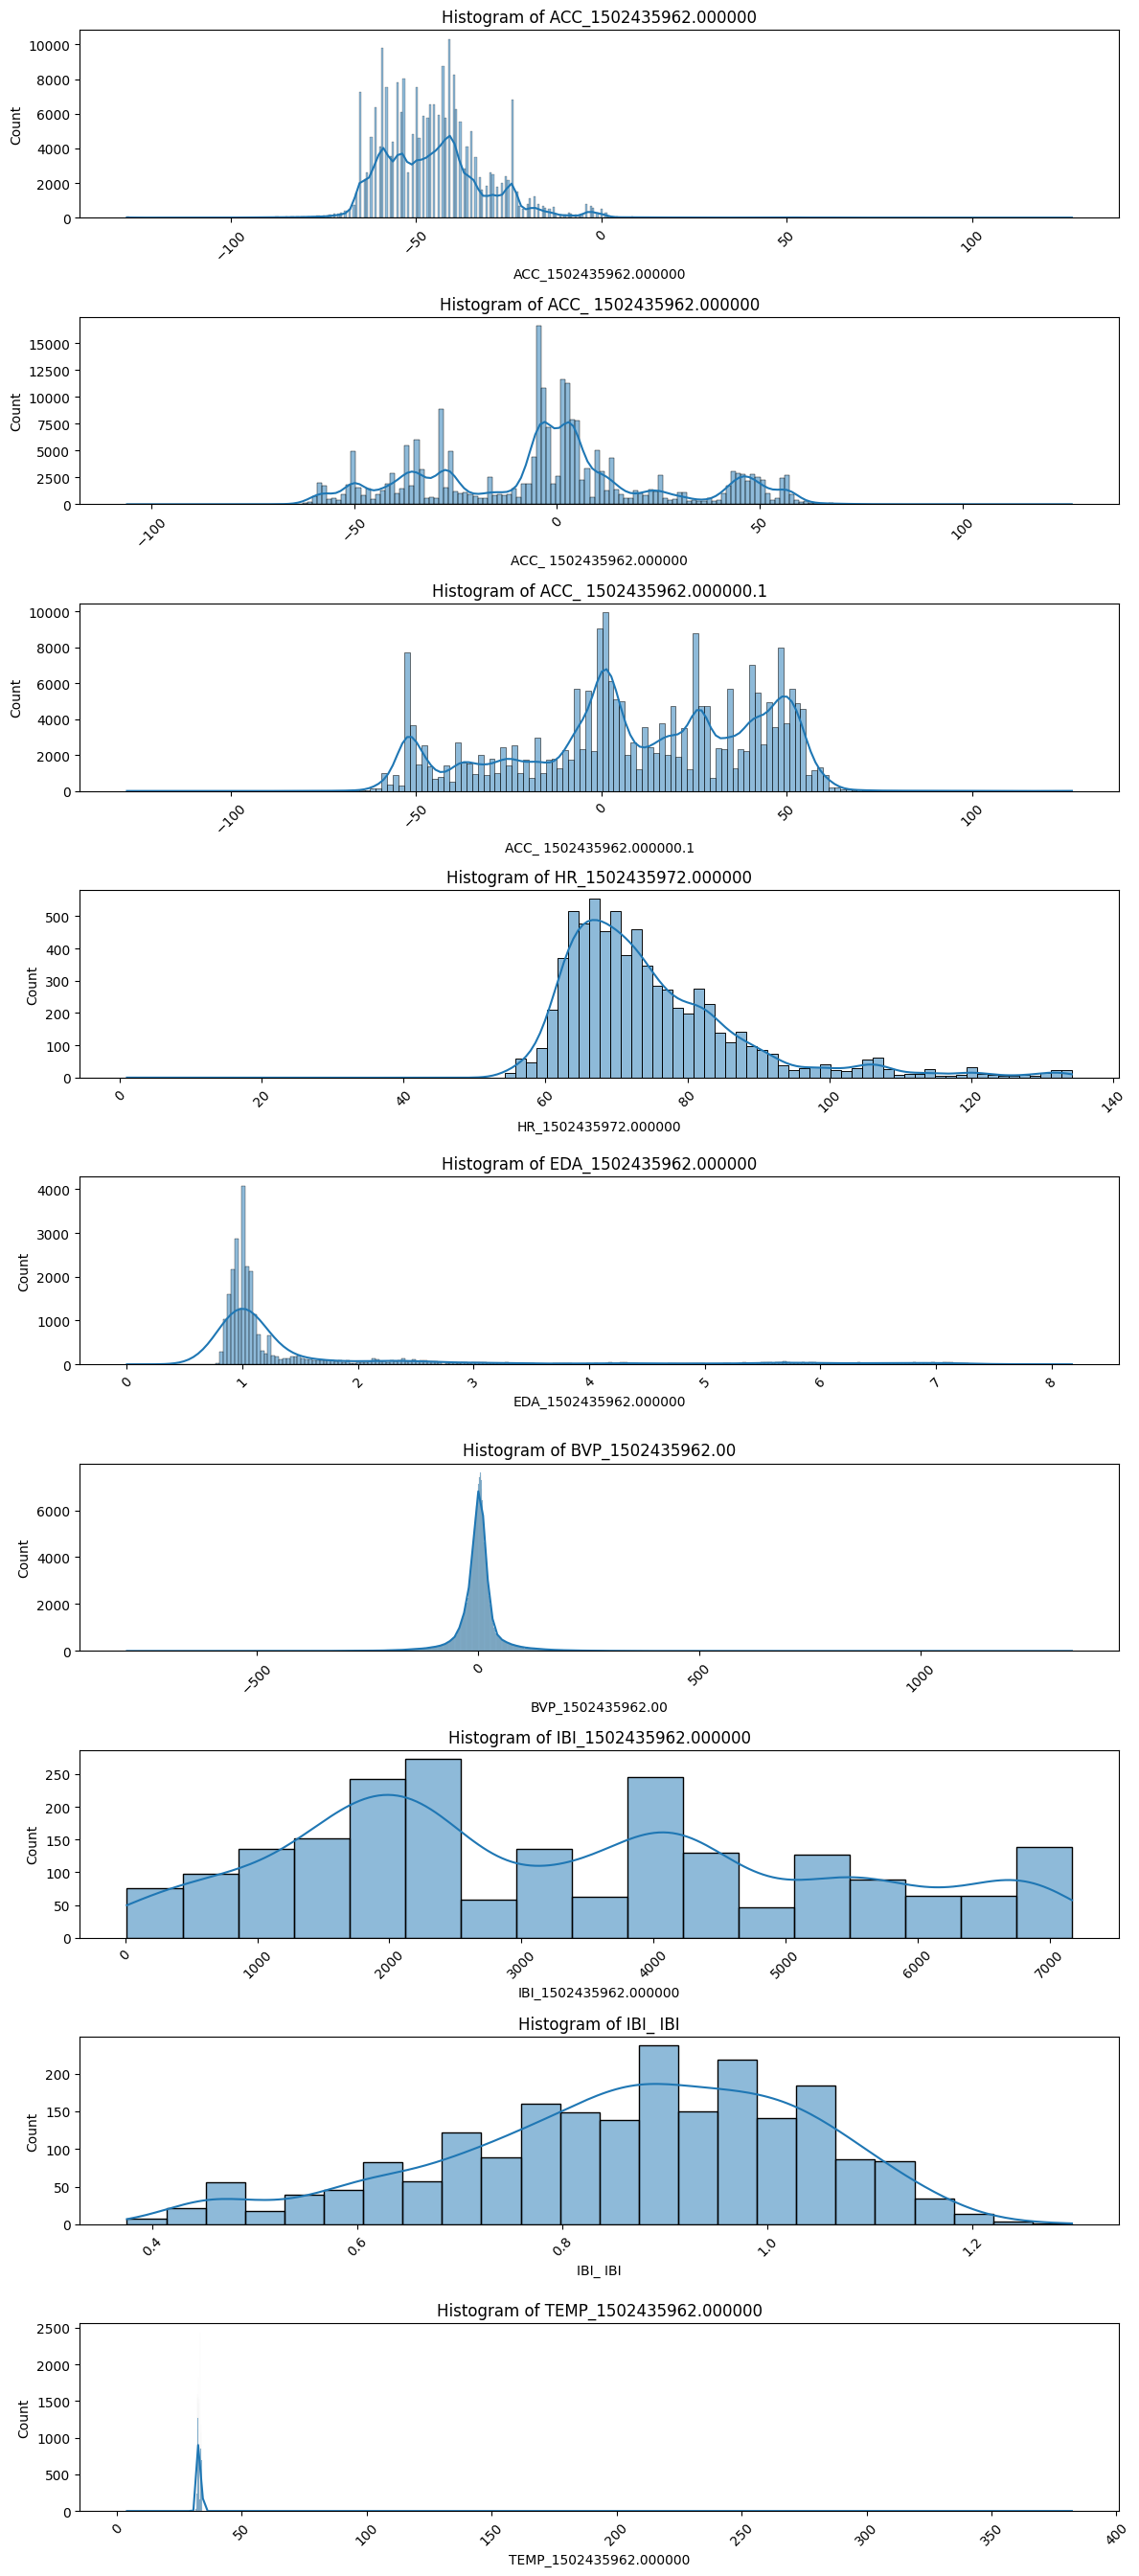

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a figure with subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(12, 3*len(numerical_columns)))

# Iterate through each numerical column
for i, column in enumerate(numerical_columns):
    # Plot the histogram for the current column
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    
    # Set the title for the subplot
    axes[i].set_title(f'Histogram of {column}')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Layout so plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()

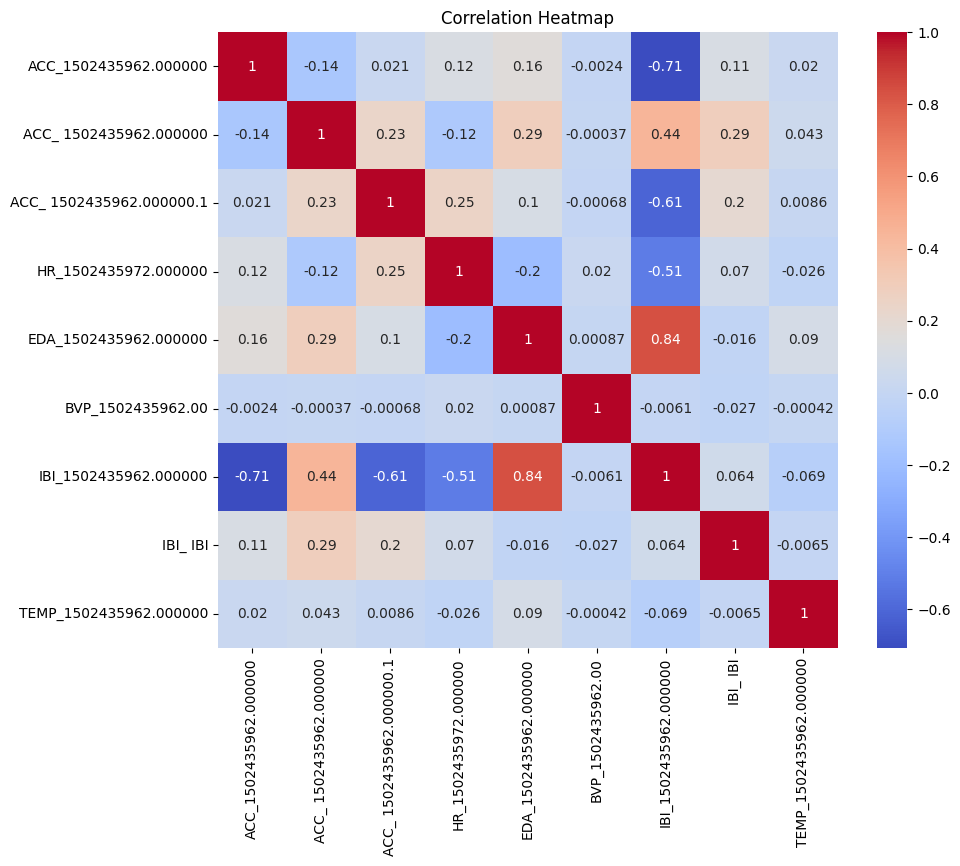

In [14]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

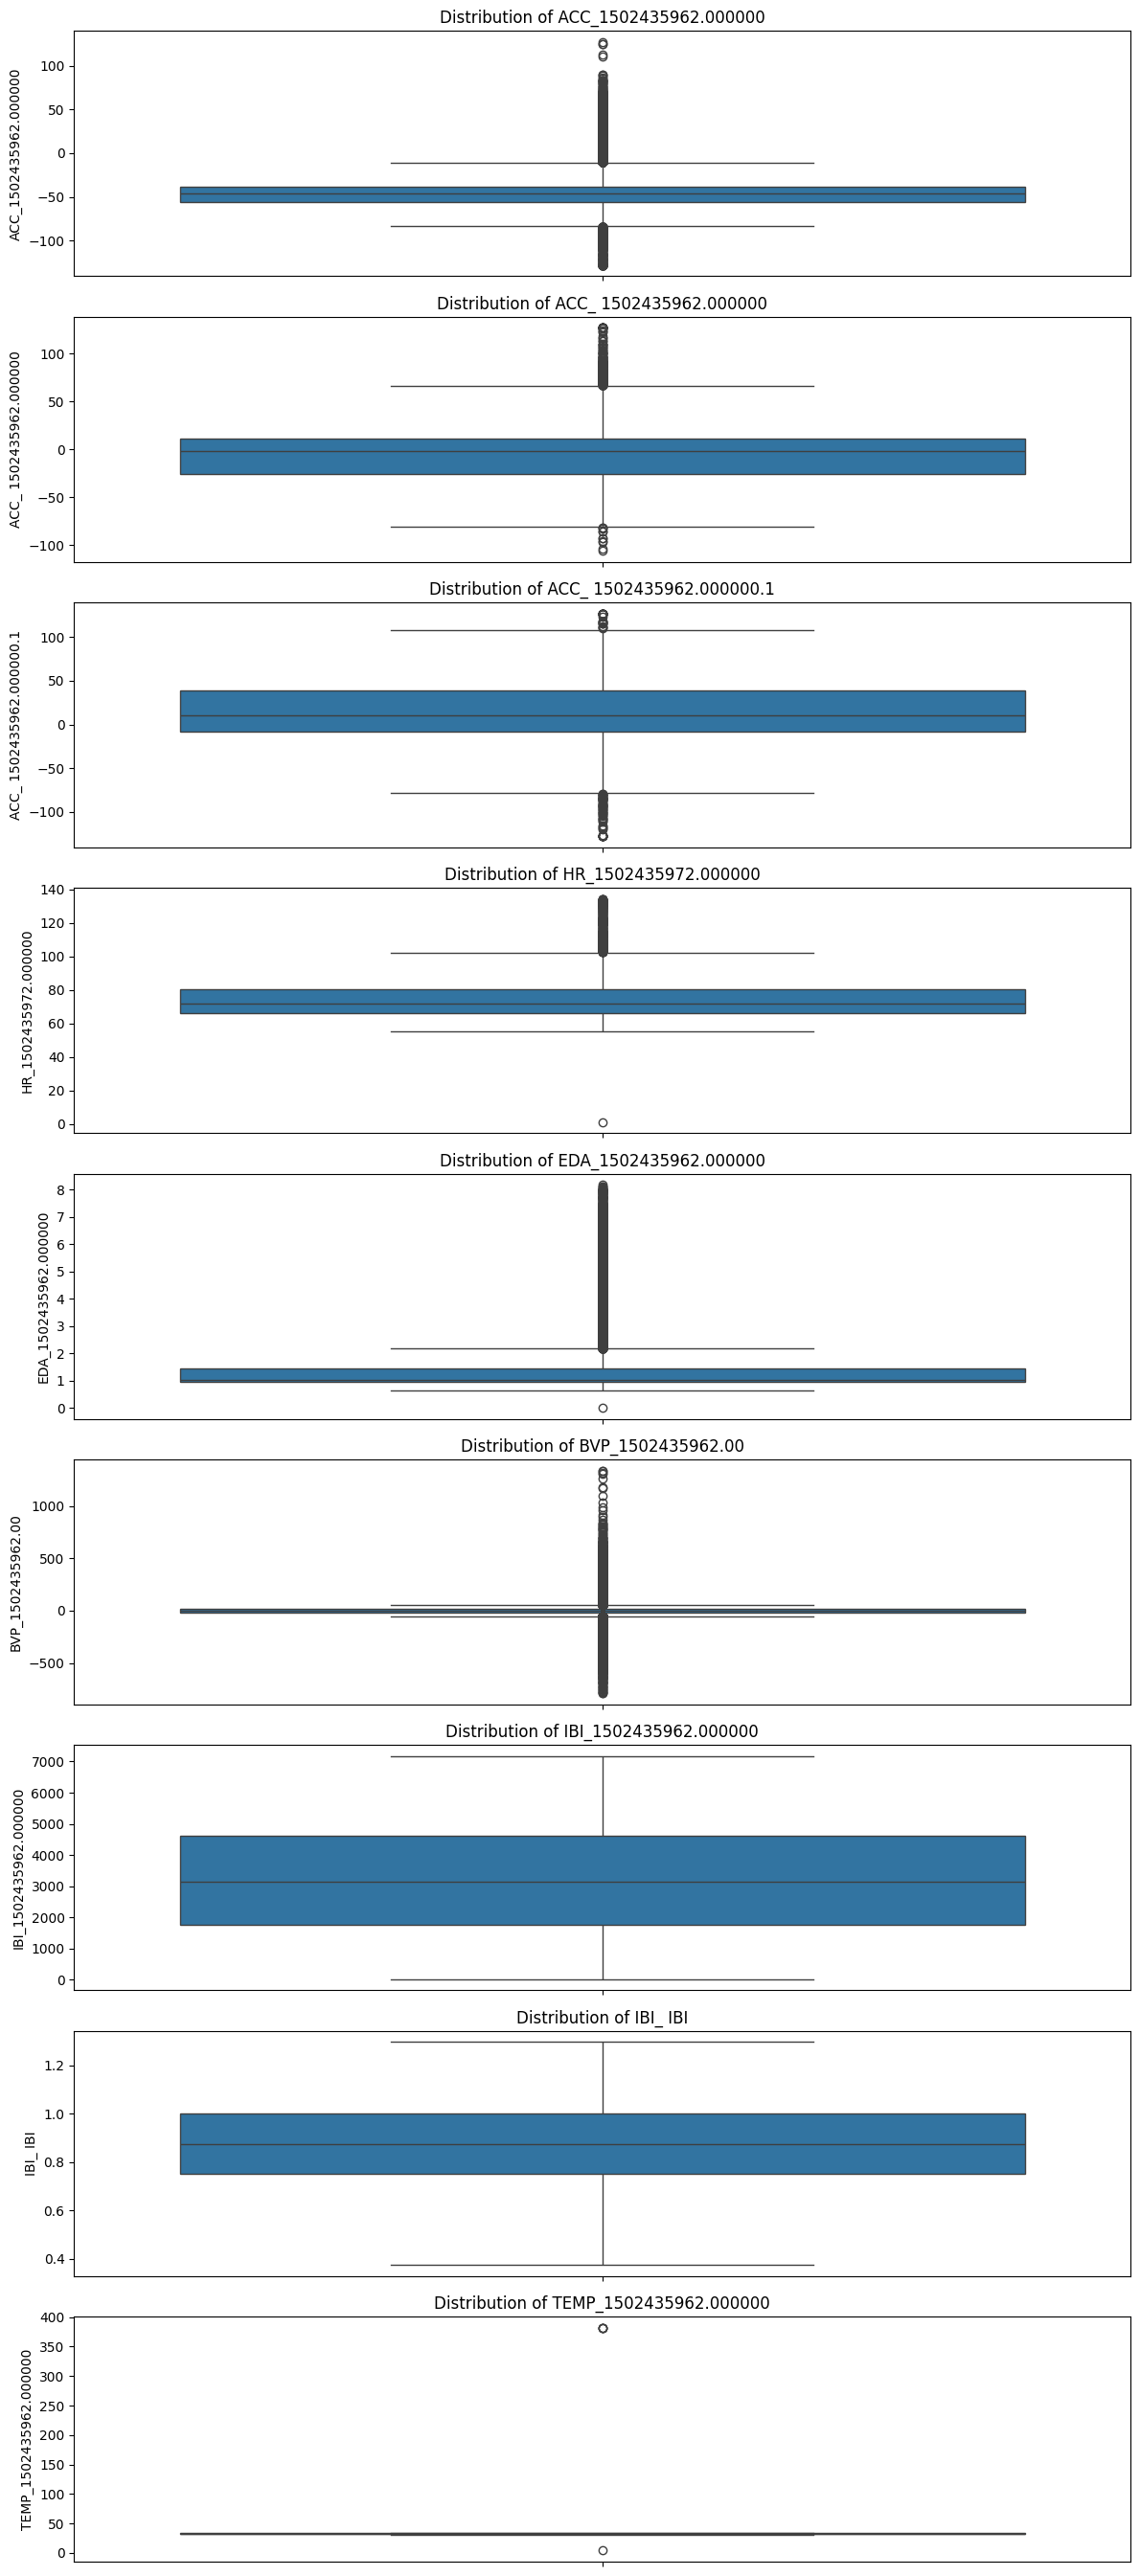

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Get the list of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a figure with subplots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(12, 3*len(numerical_columns)))

# Iterate through each numerical column
for i, column in enumerate(numerical_columns):
    # Plot the box plot for the current column
    sns.boxplot(data=df, y=column, ax=axes[i])
    
    # Set the title for the subplot
    axes[i].set_title(f'Distribution of {column}')
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

# Layout so plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [17]:
# Perform correlation analysis
correlation_matrix = df[numeric_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          ACC_1502435962.000000  ACC_ 1502435962.000000  \
ACC_1502435962.000000                  1.000000               -0.136151   
ACC_ 1502435962.000000                -0.136151                1.000000   
ACC_ 1502435962.000000.1               0.021324                0.233049   
HR_1502435972.000000                   0.117777               -0.118562   
EDA_1502435962.000000                  0.160614                0.291385   
BVP_1502435962.00                     -0.002395               -0.000365   
IBI_1502435962.000000                 -0.707526                0.444010   
IBI_ IBI                               0.109250                0.291631   
TEMP_1502435962.000000                 0.020200                0.042853   

                          ACC_ 1502435962.000000.1  HR_1502435972.000000  \
ACC_1502435962.000000                     0.021324              0.117777   
ACC_ 1502435962.000000                    0.233049             -0.118562   
A

In [26]:
potential_targets = [col for col in df.columns if col.endswith(('0', '1')) or ('Class' in col)]
print("Potential target columns:", potential_targets)

Potential target columns: ['ACC_1502435962.000000', 'ACC_ 1502435962.000000', 'ACC_ 1502435962.000000.1', 'HR_1502435972.000000', 'EDA_1502435962.000000', 'BVP_1502435962.00', 'IBI_1502435962.000000', 'TEMP_1502435962.000000']


In [27]:
for col in potential_targets:
    print(f"{col}: {df[col].nunique()} unique values")

ACC_1502435962.000000: 219 unique values
ACC_ 1502435962.000000: 201 unique values
ACC_ 1502435962.000000.1: 228 unique values
HR_1502435972.000000: 2410 unique values
EDA_1502435962.000000: 4459 unique values
BVP_1502435962.00: 37110 unique values
IBI_1502435962.000000: 2138 unique values
TEMP_1502435962.000000: 128 unique values


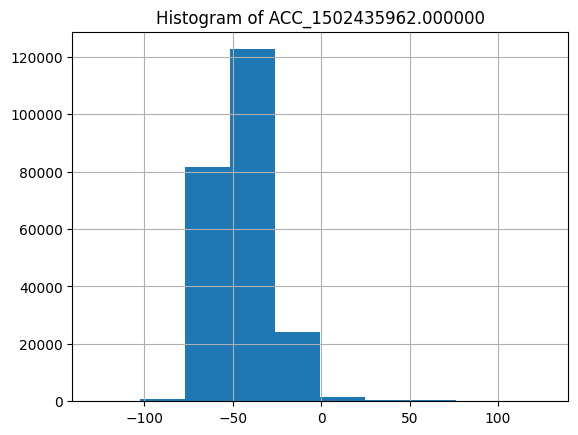

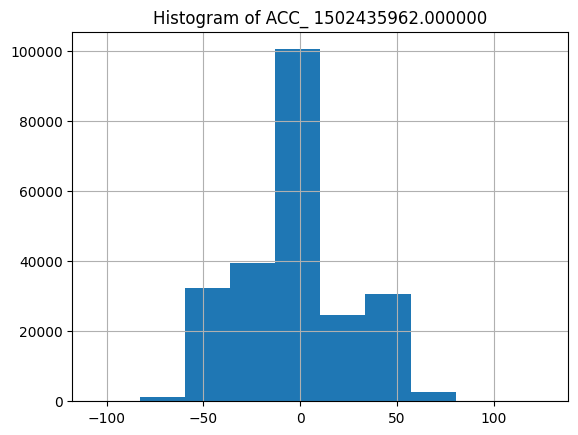

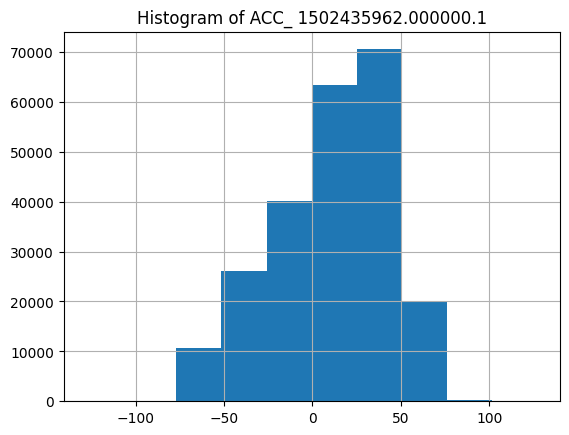

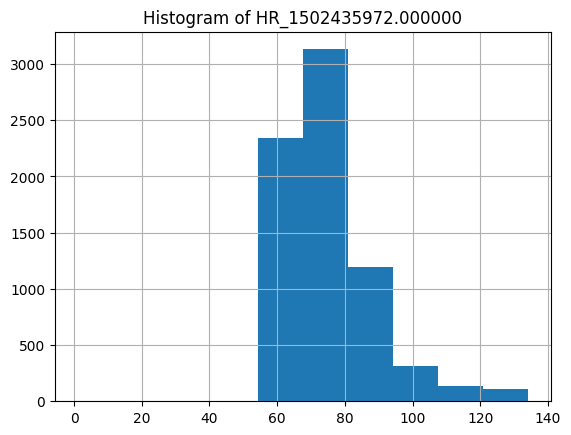

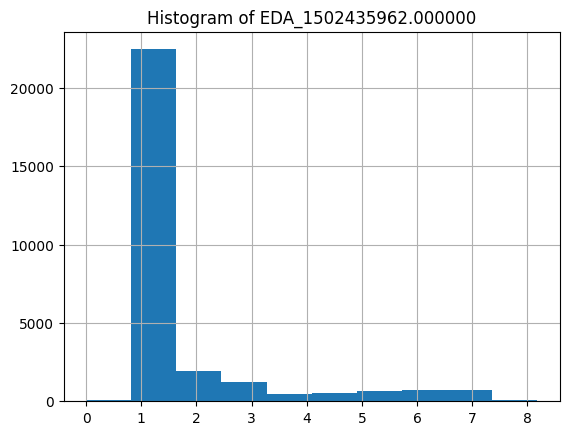

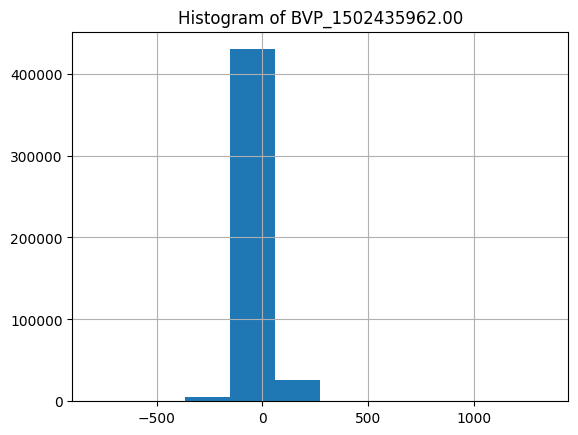

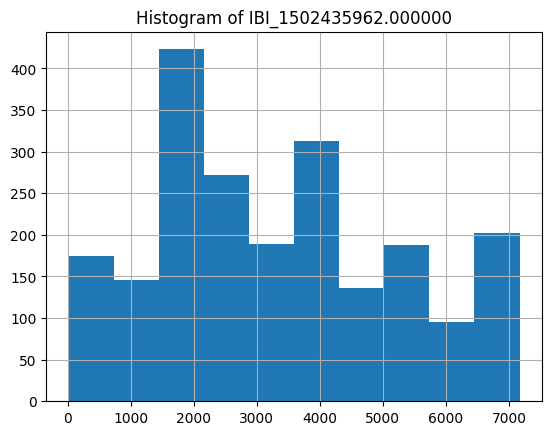

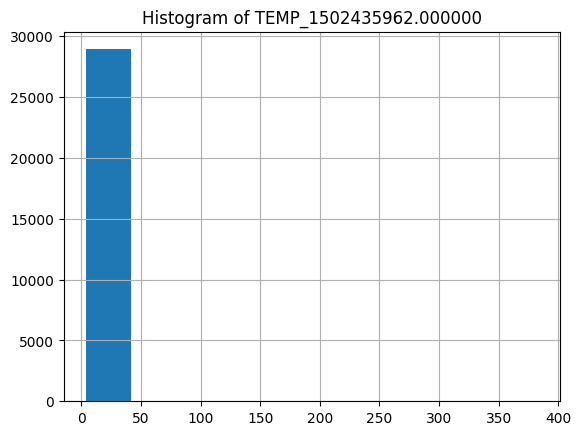

In [28]:
import matplotlib.pyplot as plt

for col in potential_targets:
    df[col].hist(bins=10)
    plt.title(f'Histogram of {col}')
    plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming the CSV file is in the same directory as your script
df = pd.read_csv('S17_E4_Data.csv')

# Define the target columns
target_columns = ['ACC_1502435962.000000', 'ACC_ 1502435962.000000', 'ACC_ 1502435962.000000.1', 
                  'HR_1502435972.000000', 'EDA_1502435962.000000', 'BVP_1502435962.00', 
                  'IBI_1502435962.000000', 'TEMP_1502435962.000000']

# Combine all target columns into one column
df['combined_target'] = df[target_columns].mean(axis=1)

# Drop the original target columns and keep only the combined one
df = df.drop(target_columns, axis=1)
target_column = 'combined_target'

# Split the data into features (X) and target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
X_sorted = X.iloc[:, sorted_idx]

# Select top N features (e.g., 10)
N = 10
X_selected_rf = X_sorted.iloc[:, :N]

In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

In [38]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
X_sorted = X.iloc[:, sorted_idx]

# Select top N features
N = 10  # Number of features to select
X_selected = X_sorted.iloc[:, :N]
y_selected = y

In [39]:
selector = SelectKBest(f_classif, k=N)
X_selectedskb = selector.fit_transform(X, y)

C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=1. All the features will be returned.
  warnings.warn(


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 0.99


In [43]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [44]:
# For example, with RandomForestRegressor:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

y_pred_rf = rf_model.predict(X_test_selected)
print(f"Random Forest R-squared: {rf_model.score(X_test_selected, y_test)}")


Random Forest R-squared: 0.3692532189547204


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestRegressor model on the selected features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = rf.score(X_test, y_test)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Print the feature scores and support
feature_scores = selector.scores_

C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
C:\Users\VARKEY JOSHY T\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Mean Squared Error: 0.01
R-squared Score: 0.37


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train multiple regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "SVR": SVR(),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(50,)),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    print(f"\n{name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared Score: {r2:.2f}")

# Print feature importance for Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

top_features = sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Features by Random Forest Importance:")
for feature, importance in top_features:
    print(f"{feature}: {importance:.4f}")


Linear Regression:
Mean Squared Error: 0.02
R-squared Score: -0.00

Random Forest Regressor:
Mean Squared Error: 0.01
R-squared Score: 0.37

SVR:
Mean Squared Error: 0.02
R-squared Score: 0.02

MLP Regressor:
Mean Squared Error: 0.02
R-squared Score: 0.28

Decision Tree Regressor:
Mean Squared Error: 0.01
R-squared Score: 0.37

Gradient Boosting Regressor:
Mean Squared Error: 0.01
R-squared Score: 0.37

AdaBoost Regressor:
Mean Squared Error: 0.02
R-squared Score: 0.04

K-Nearest Neighbors Regressor:
Mean Squared Error: 0.01
R-squared Score: 0.35

Top 10 Features by Random Forest Importance:
IBI_ IBI: 1.0000


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

In [69]:
pipe = Pipeline([
    ('selector', SelectKBest(score_func=f_classif)),
    ('rf', RandomForestRegressor(random_state=42))
])

param_grid = {
    'selector__k': [5, 10, 15],
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 5, 10]
}

In [74]:
# Define custom scorer for negative mean squared error
neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [77]:
print(f"\nFinal Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Final Model Performance:
Mean Squared Error: 0.01
R-squared Score: 0.37


In [82]:
import joblib

# Save the model
model_path = 'random_forest_model.joblib'
joblib.dump(rf, model_path)
print(f"Model saved to {model_path}")

# Save the feature selector
selector_path = 'feature_selector.joblib'
joblib.dump(selector, selector_path)
print(f"Feature selector saved to {selector_path}")

# To load the model later:
# loaded_rf = joblib.load('random_forest_model.joblib')
# loaded_selector = joblib.load('feature_selector.joblib')


Model saved to random_forest_model.joblib
Feature selector saved to feature_selector.joblib
